Problems solutions

## Topic 1 - Introduction

### Problem 1.

Use the help function to explore what the series gafa_stock, PBS, vic_elec and pelt represent.

    - Use autoplot() to plot some of the series in these data sets.
    - What is the time interval of each series?

**GAFA** - Historical stock prices from 2014-2018 for **G**oogle, **A**mazon, **F**acebook and **A**pple. All prices are in $USD.

- **Open**: The opening price for the stock.
- **High**: The stock’s highest trading price.
- **Low**: The stock’s lowest trading price.
- **Close**: The closing price for the stock.
- **Adj_Close**: The adjusted closing price for the stock.
- **Volume**: The amount of stock traded.

##### Plot of the Close Price

In [28]:
import pandas as pd
# data usage
from tsdata.raw import available_data, load_data

# plotting
import seaborn as sns
from plotnine import (ggplot, geom_line, xlab, ylab, ggtitle, aes, theme, facet_wrap, facet_grid,
                      geom_point, geom_hline, geom_vline, xlim, ylim, theme_classic, theme_minimal,
                      element_blank, element_line, element_text, theme_538)

import matplotlib.font_manager as fm
fpath = "./xkcd.otf"

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

/usr/local/Caskroom/miniconda/base/envs/fpp/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


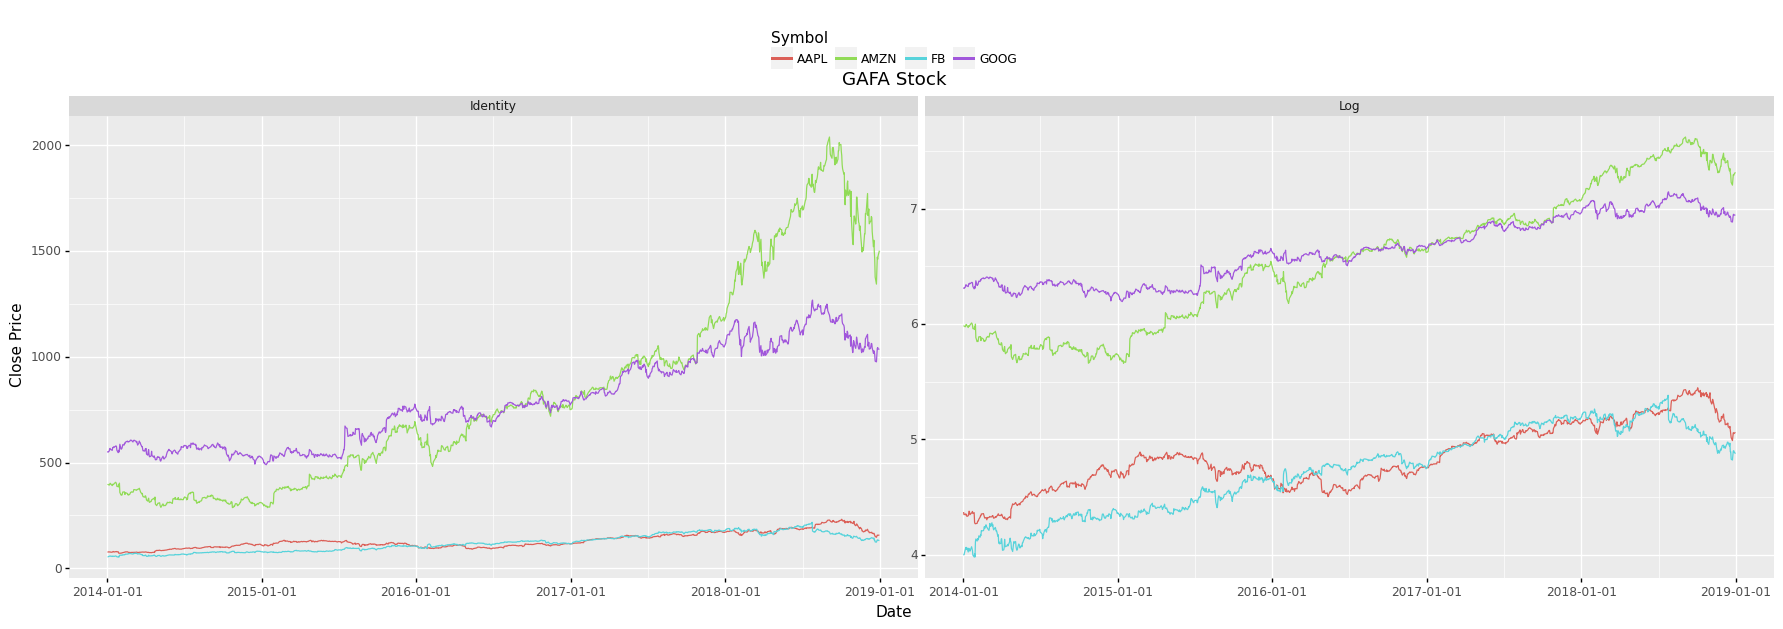

<ggplot: (8764604295876)>

In [29]:
import numpy as np

# For stock market prices and indexes, the best forecasting method is often the naïve method. That is, each forecast is simply equal to the last observed value, 
gafa_stock_df = (load_data("gafa_stock")
 .assign(Date=lambda df: pd.to_datetime(df.Date))
#  .set_index('Date')
)

# gafa_stock_df.columns

close_ggplot = (pd.concat([
    gafa_stock_df.assign(Transformation='Identity'),
    gafa_stock_df.assign(Transformation='Log', Close=lambda df: np.log(df.Close))
]).pipe(ggplot) +
    aes(x='Date', y='Close', color='Symbol') +
    geom_line() +
    facet_wrap('Transformation', scales='free') +
    theme(figure_size=[22, 6], legend_position='top') +
    ylab("Close Price") +
    ggtitle("GAFA Stock")
)

close_ggplot

In [30]:
# problem 2
max_close_price_dates = (gafa_stock_df
 .set_index('Date')
 .groupby('Symbol')
 .idxmax()['Close']
)
max_close_price_dates

# we can also plot them in some way
# five_days = pd.to_timedelta(5, unit='d')

# (close_ggplot +
#  geom_vline(xintercept=max_close_price_dates, linetype='dashed') +
#  xlim([
#      max_close_price_dates.min() - five_days,
#      max_close_price_dates.max() + five_days
#  ])
# )

Symbol
AAPL   2018-10-03
AMZN   2018-09-04
FB     2018-07-25
GOOG   2018-07-26
Name: Close, dtype: datetime64[ns]

### Problem 3

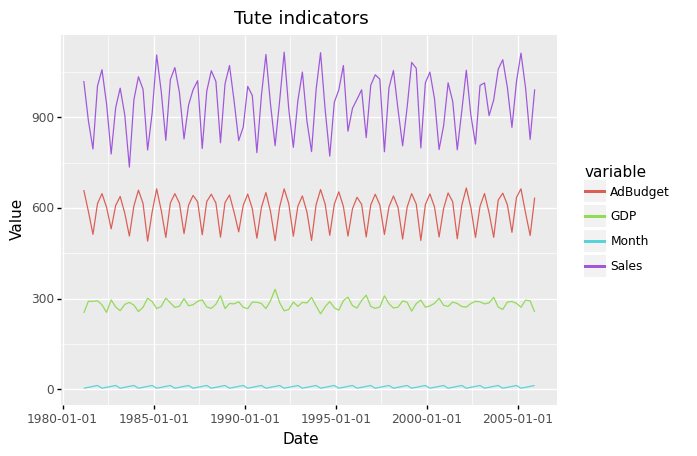

<ggplot: (8764606684170)>

In [31]:
tute1_df = (pd.read_csv("./tute1.csv")
.assign(Quarter=lambda df: pd.to_datetime(df.Quarter))
 .assign(
     Date = lambda df: df.Quarter,
     Year = lambda df: df.Quarter.dt.year,
     Month = lambda df: df.Quarter.dt.month,
     Quarter = lambda df: df.Quarter.dt.quarter
 )
)

(tute1_df
 .melt(id_vars=['Date', 'Year', 'Quarter'])
 .pipe(ggplot) +
    aes(x='Date', y='value', color='variable') +
    geom_line() +
    ylab("Value") +
    ggtitle("Tute indicators")
)


**Some questions we might ask for the tute dataset are**
- Is there seasonality, trend, cylcal business (economic) patterns?
- Are the series correlated in some way?
- Is there autocorrelation in the series?
- Are there any specific outliers?

We can also plot the series grouped by years

/usr/local/Caskroom/miniconda/base/envs/fpp/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


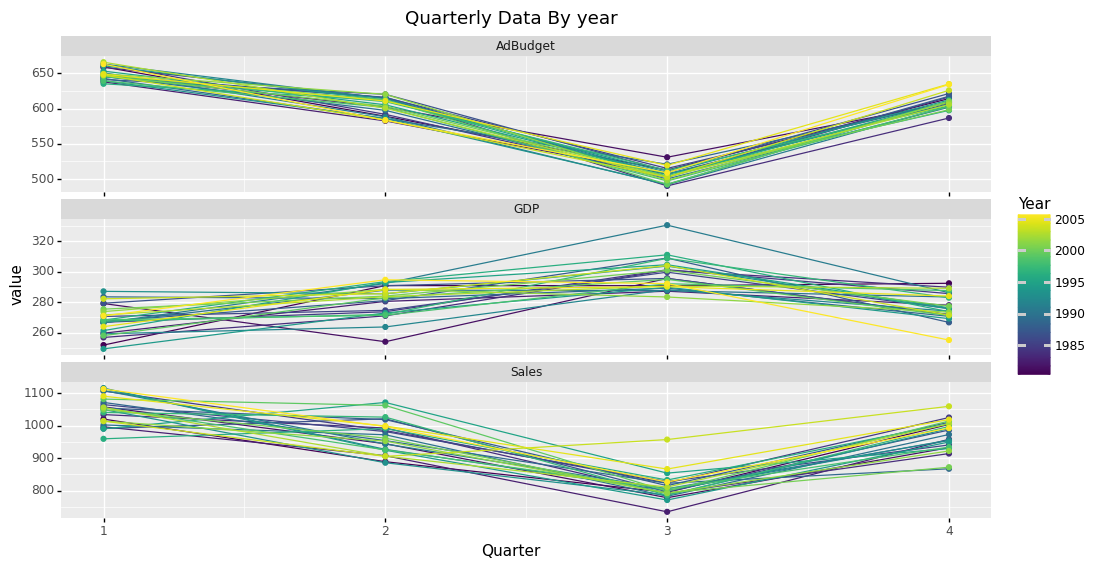

<ggplot: (8764606678565)>

In [32]:

(tute1_df
.melt(id_vars=['Quarter', 'Year', 'Month', 'Date'])
.pipe(ggplot) +
 aes(x='Quarter', y='value', color='Year', group='Year') +
 geom_line() + geom_point() + ggtitle("Quarterly Data By year") +
 facet_wrap('variable', ncol=1, scales='free') +
 theme(figure_size=[12, 6])
)

In [33]:
# What about autocorrelation
# from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
# pd.plotting.lag_plot(tute1_df.Sales, lag=4)
# pd.plotting.lag_plot(tute1_df.AdBudget, lag=2)

def plot_tute_autocorrelation(lag):
    return pd.plotting.lag_plot(tute1_df.AdBudget, lag=lag)

# We can see that the seasonality is of frequency = 4
interact(plot_tute_autocorrelation, lag=IntSlider(min=1, max=20, step=1, value=1))


interactive(children=(IntSlider(value=1, description='lag', max=20, min=1), Output()), _dom_classes=('widget-i…

<function __main__.plot_tute_autocorrelation(lag)>

In [34]:
# Problem 4
# plot natural gas consumption by state
from ipywidgets import SelectMultiple

us_gas_df = load_data("us_gas_total")

w = widgets.SelectMultiple(
    options=us_gas_df.state.unique(),
    value=['Alabama'],
    #rows=10,
    description='States',
    disabled=False
)

def plot_gas_consumption(states):
    return (
        ggplot(us_gas_df[us_gas_df.state.isin(states)]) +
        aes(x="year", y="y", color="state") +
        geom_line() +
        xlab("Year") +
        ylab("Gas Demand") +
        ggtitle("Gas Demand in States by Year")
        
    )

# display(w)
interact(plot_gas_consumption, states=w)

interactive(children=(SelectMultiple(description='States', index=(0,), options=('Alabama', 'Alaska', 'Arizona'…

<function __main__.plot_gas_consumption(states)>

In [35]:
# problem 5
tourism_df = load_data("tourism")

(tourism_df
 .groupby(["Region", "Purpose"])
 .mean()
 .reset_index()
 .max()
)

# Create a new tsibble which combines the Purposes and Regions, and just has total trips by State.
(tourism_df
 .groupby(["Region", "Purpose"])
 .sum()
 .reset_index()
)

Region   Purpose         Trips
0           Adelaide  Business  12442.232789
1           Adelaide   Holiday  12523.474955
2           Adelaide     Other   4525.075975
3           Adelaide  Visiting  16415.493342
4     Adelaide Hills  Business    213.138886
..               ...       ...           ...
299          Wimmera  Visiting   1190.398913
300  Yorke Peninsula  Business    551.398504
301  Yorke Peninsula   Holiday   6407.078790
302  Yorke Peninsula     Other    150.870727
303  Yorke Peninsula  Visiting   2251.724145

[304 rows x 3 columns]

### Problem 6.

Create time plots of the following four time series: Bricks from aus_production

/usr/local/Caskroom/miniconda/base/envs/fpp/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 20 rows containing missing values.


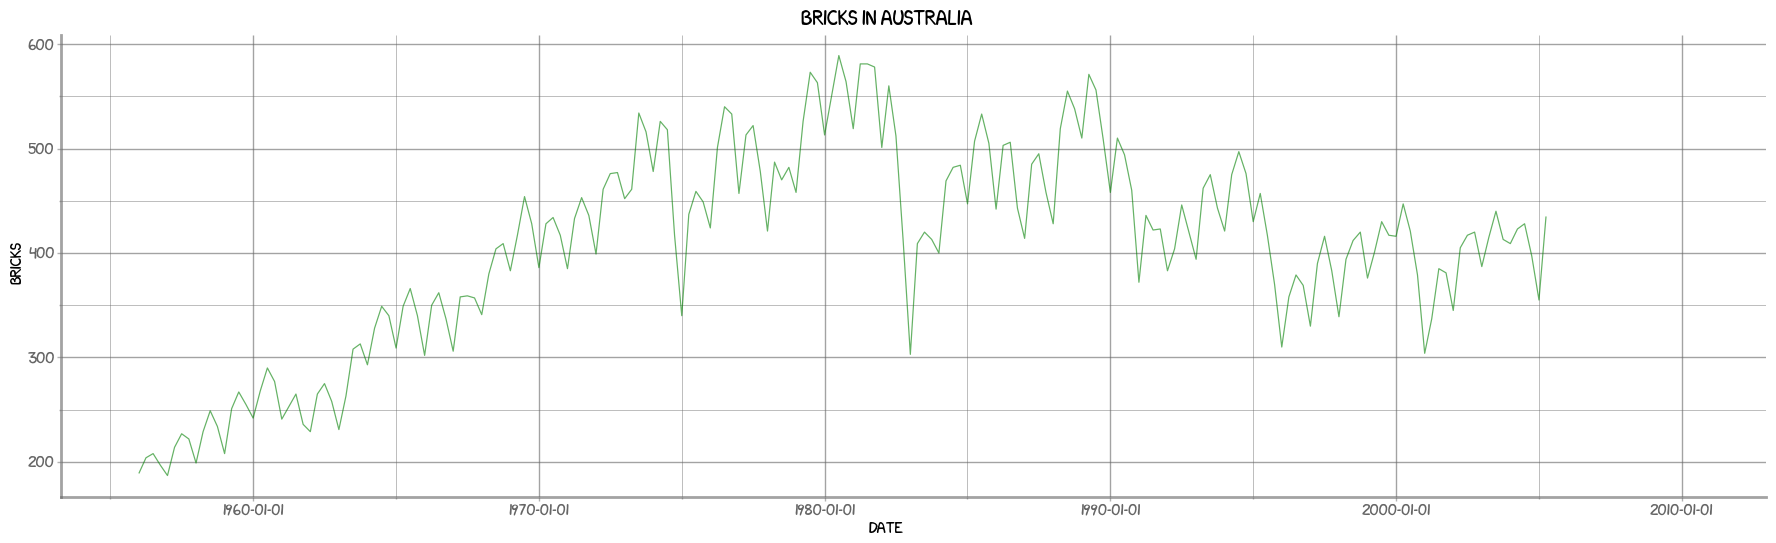

<ggplot: (8764604229642)>

In [36]:
# problem 6

aus_production_df = load_data("aus_production").assign(
    Date=lambda df: pd.to_datetime(df.Quarter.str.replace(" ", "-"))
)

aus_production_df = aus_production_df.assign(
    Date=pd.to_datetime(
        aus_production_df.Quarter.str.replace(" ", "-")
    )
)

title_text = fm.FontProperties(fname=fpath)
body_text = fm.FontProperties(fname=fpath)

def theme_xkcdf_custom():
    return theme(
        axis_line_x=element_line(size=2, colour="#666666"),
        axis_line_y=element_line(size=2, colour="#666666"),
        panel_grid_major=element_line(color="#666666", alpha=0.6),
        panel_grid_minor=element_line(color="#666666"),
        panel_border=element_line(color="#666666"),
        panel_background=element_blank(),
        line=element_line(color="grey", alpha=0.6),
        plot_title=element_text(fontproperties=title_text),
        text=element_text(fontproperties=body_text),
        axis_text_x=element_text(colour="#666666"),
        axis_text_y=element_text(colour="#666666"),
    )


(ggplot(aus_production_df) +
    aes(x="Date", y="Bricks") +
    geom_line(color="green", alpha=0.6) +
    ggtitle("Bricks in Australia") +
    theme_xkcdf_custom() +
    theme(figure_size=(22, 6))
)

### Problem 7.

The aus_arrivals data set comprises quarterly international arrivals to Australia from Japan, New Zealand, UK and the US.

- Use autoplot(), gg_season() and gg_subseries() to compare the differences between the arrivals from these four countries.
Can you identify any unusual observations

From the above plot we can see which season is most strong for which country's arrivals.

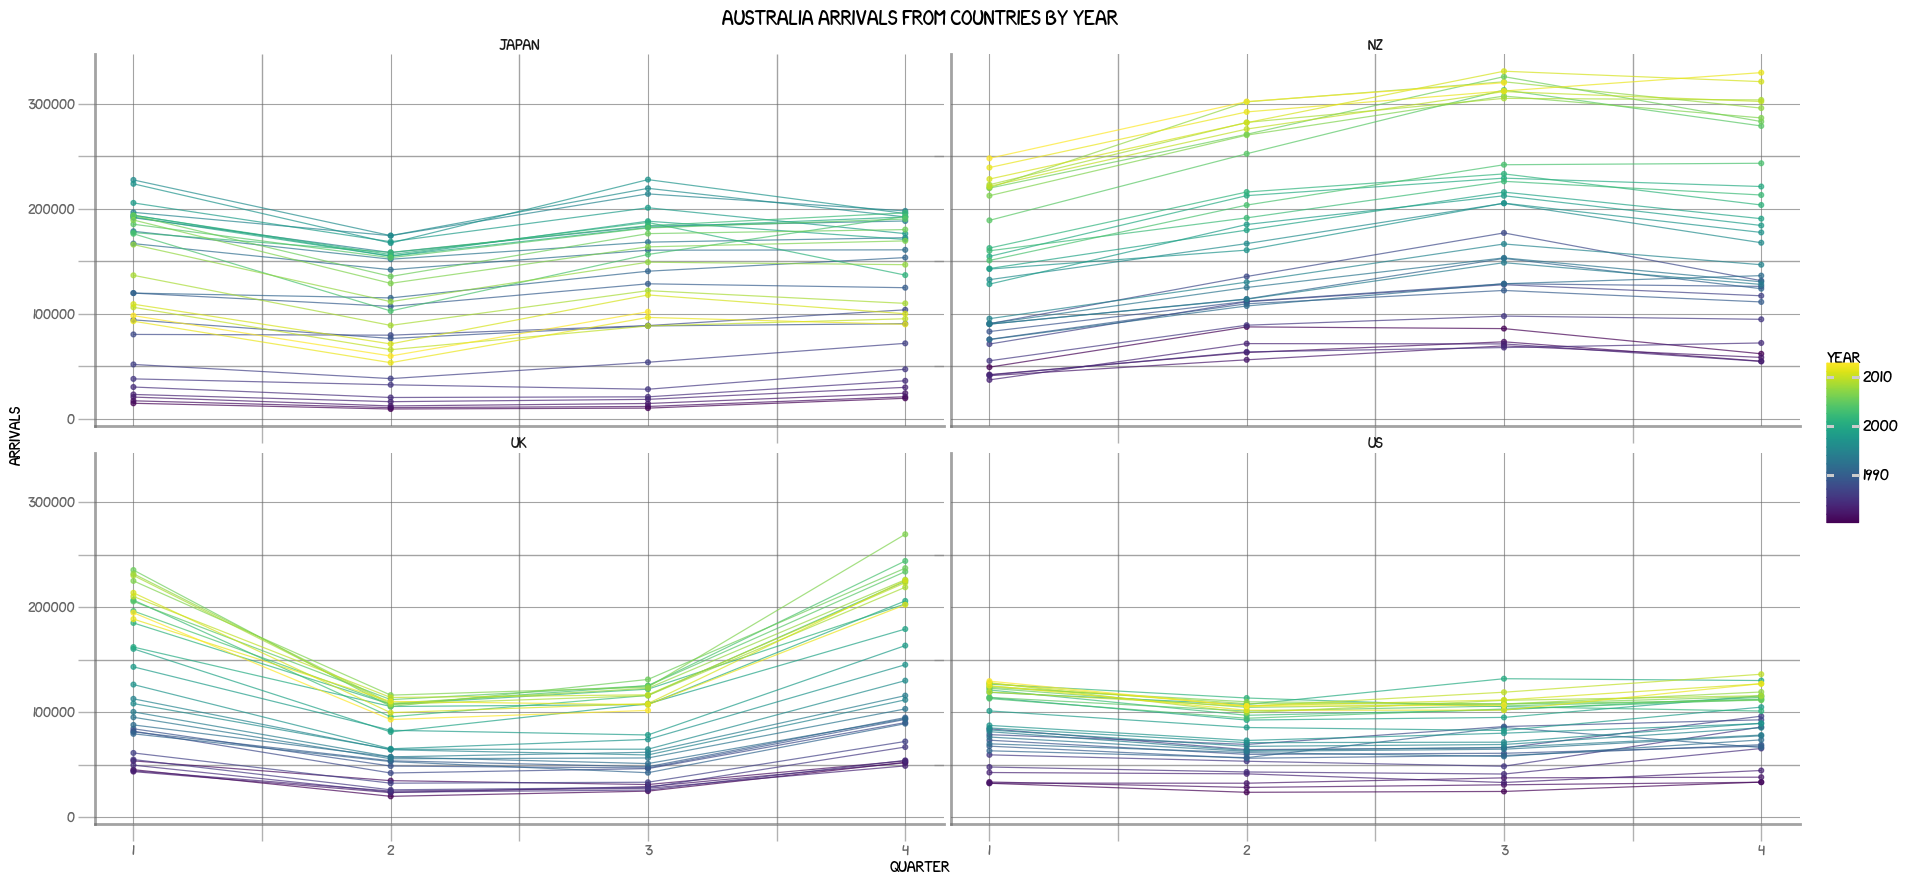

<ggplot: (8764605270532)>

In [55]:
# problem 7
aus_arrivals_df = (
 load_data("aus_arrivals").assign(
    Date=lambda df: pd.to_datetime(df.Quarter.str.replace(" ", "-"))
 ).assign(
    Year = lambda df: df.Date.dt.year,
    Quarter = lambda df: df.Date.dt.quarter
 )
)

(ggplot(aus_arrivals_df) +
    aes(x='Quarter', y='Arrivals', color='Year', group='Year') +
    geom_line(alpha=0.7) +
    geom_point(alpha=0.7) +
    facet_wrap("Origin") +
    theme_minimal() +
    theme(figure_size=(22, 10), legend_position="right") +
    ggtitle("Australia Arrivals from Countries by Year") +
    theme_xkcdf_custom()
)


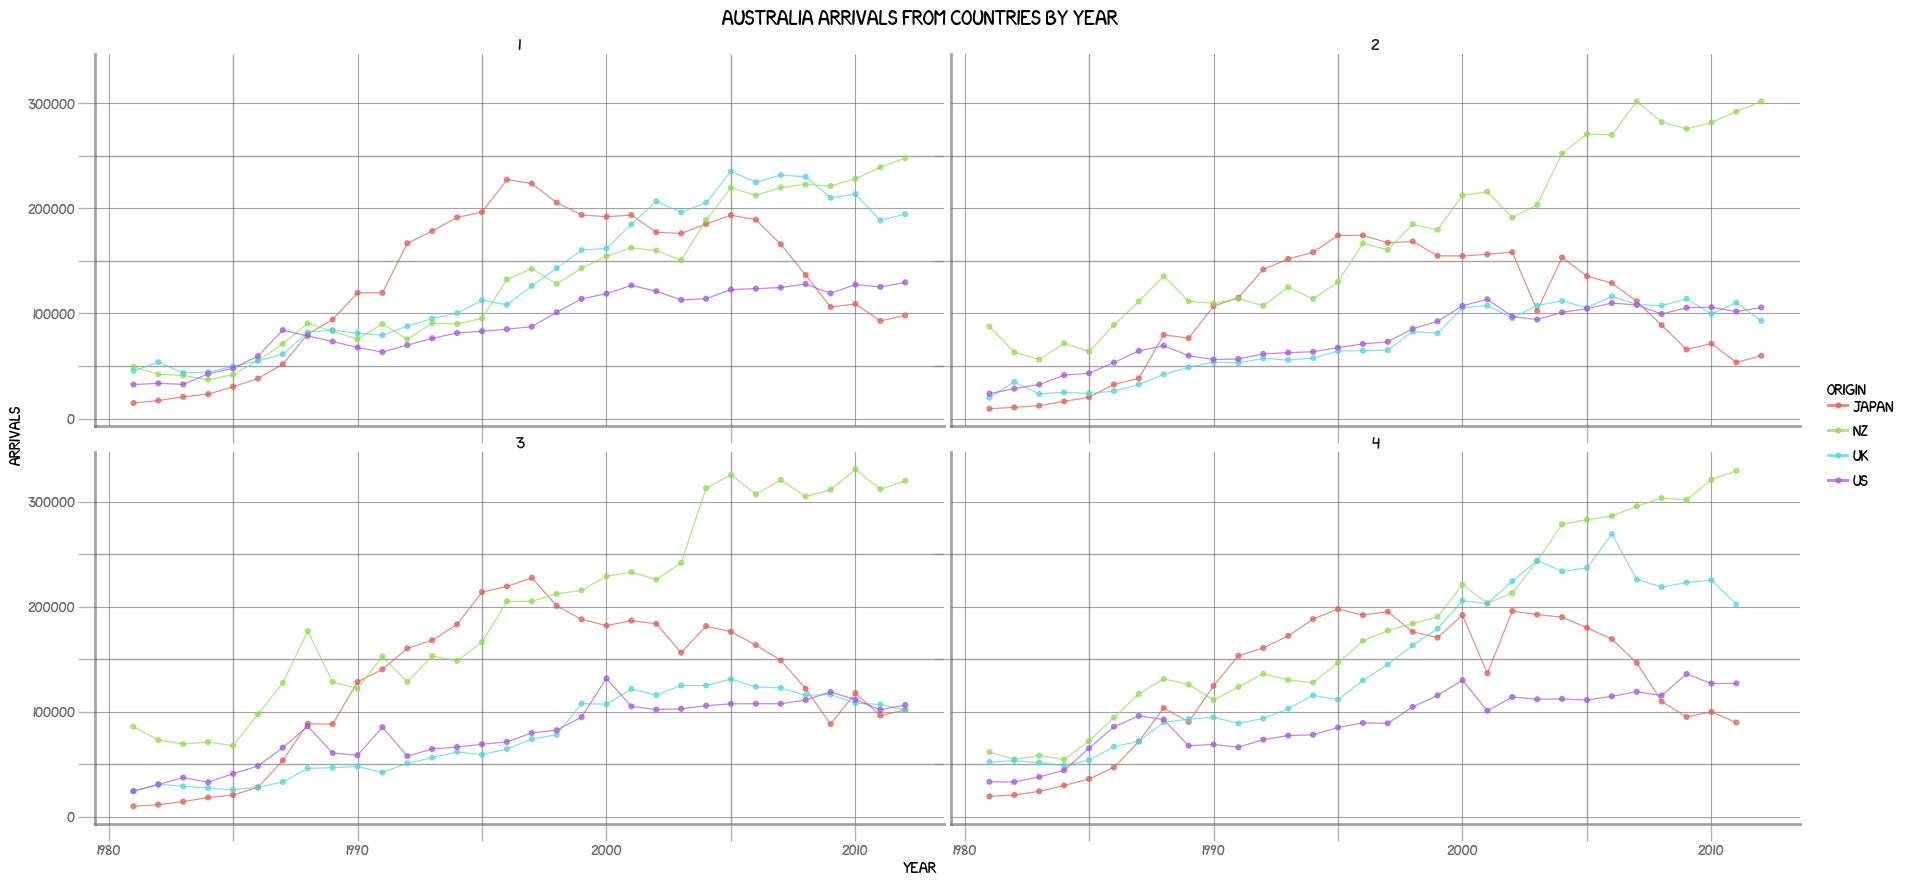

<ggplot: (8764606171007)>

In [57]:
(ggplot(aus_arrivals_df) +
    aes(x='Year', y='Arrivals', color='Origin', group='Origin') +
    geom_line(alpha=0.7) +
    geom_point(alpha=0.7) +
    facet_wrap("Quarter") +
    theme_minimal() +
    theme(figure_size=(22, 10), legend_position="right") +
    ggtitle("Australia Arrivals from Countries by Year") +
    theme_xkcdf_custom()
)

From the above plots we can see that 
- arrivals from Japan have increased for all quarters till around 2005 and they have started dropping drastically.
- We have an increasing trend for quarter of the arrivals from the rest of the countries, but strongest is for New Zealand, especially for Quarters 3 and 4.
- UK and US have very similiar behaviour for quarters 2 and 3, but for quarter 1 and 4 UK arrivals have increased a lot more.
- US arrivals are pretty much the same for each quarter, but they have increased throughout the years.
- The decrease in Japan's arrivals can also be seen from the first plot, where we can see that the brightest line is not at the top, but is actually somewhere in the middle
- UK arrivals have also started decreasing in recent years, though not as much as Japsan's arrivals
- There's a huge drop for Japan's arrivals in the year 2003 for quarters 2, 3, 4, but also for the rest of the countries


### Problem 8.

Monthly Australian retail data is provided in aus_retail. Select one of the time series as follows (but choose your own seed value):

- Explore your chosen retail time series using the following functions: autoplot(), gg_season(), gg_subseries(), gg_lag(), ACF() %>% autoplot()

- Can you spot any seasonality, cyclicity and trend? What do you learn about the series?



In [39]:
# problem 8
aus_retail_df = load_data("aus_retail").assign(
    Date=lambda df: pd.to_datetime(df.Month, format="%Y %b")
).assign(
    Year=lambda df: df.Date.dt.year, Month=lambda df: df.Date.dt.month
)
aus_retail_df.head()

State                                  Industry  \
0  Australian Capital Territory  Cafes, restaurants and catering services   
1  Australian Capital Territory  Cafes, restaurants and catering services   
2  Australian Capital Territory  Cafes, restaurants and catering services   
3  Australian Capital Territory  Cafes, restaurants and catering services   
4  Australian Capital Territory  Cafes, restaurants and catering services   

   Series ID  Month  Turnover       Date  Year  
0  A3349849A      4       4.4 1982-04-01  1982  
1  A3349849A      5       3.4 1982-05-01  1982  
2  A3349849A      6       3.6 1982-06-01  1982  
3  A3349849A      7       4.0 1982-07-01  1982  
4  A3349849A      8       3.6 1982-08-01  1982

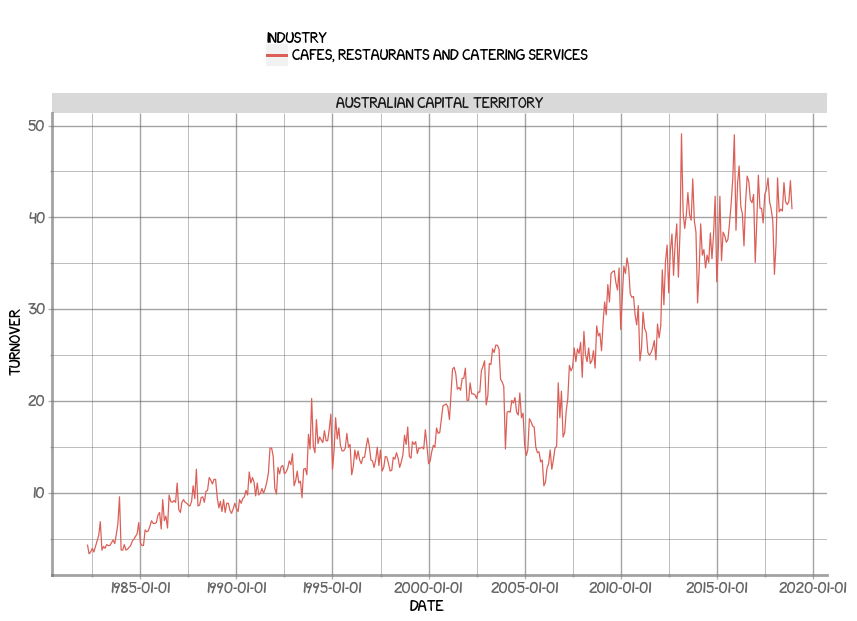

<ggplot: (8764605982591)>

In [40]:
industries = aus_retail_df.Industry.unique()
states = aus_retail_df.State.unique()

series = aus_retail_df[aus_retail_df["Series ID"] == 'A3349849A']

(ggplot(series) +
    aes(x='Date', y='Turnover', color='Industry') +
    geom_line() +
    facet_wrap("State") +
    theme(figure_size=(10, 6), legend_position="top") +
    theme_xkcdf_custom()
)

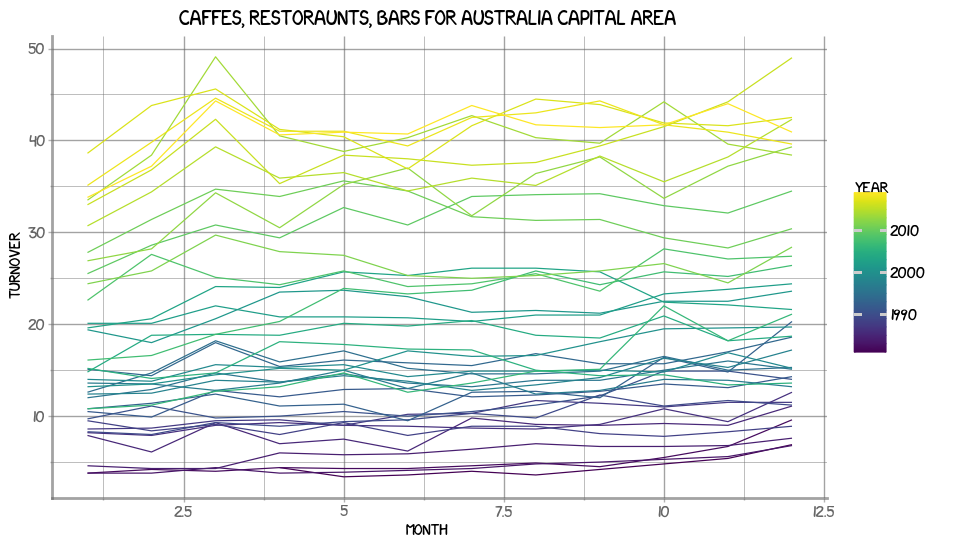

<ggplot: (8764604671648)>

In [41]:
(ggplot(series) +
    aes(x='Month', y='Turnover', color='Year', group='Year') +
    geom_line() +
    theme(figure_size=(10, 6), legend_position="right") +
    ggtitle("Caffes, Restoraunts, Bars for Australia Capital Area") +
    theme_xkcdf_custom()
)

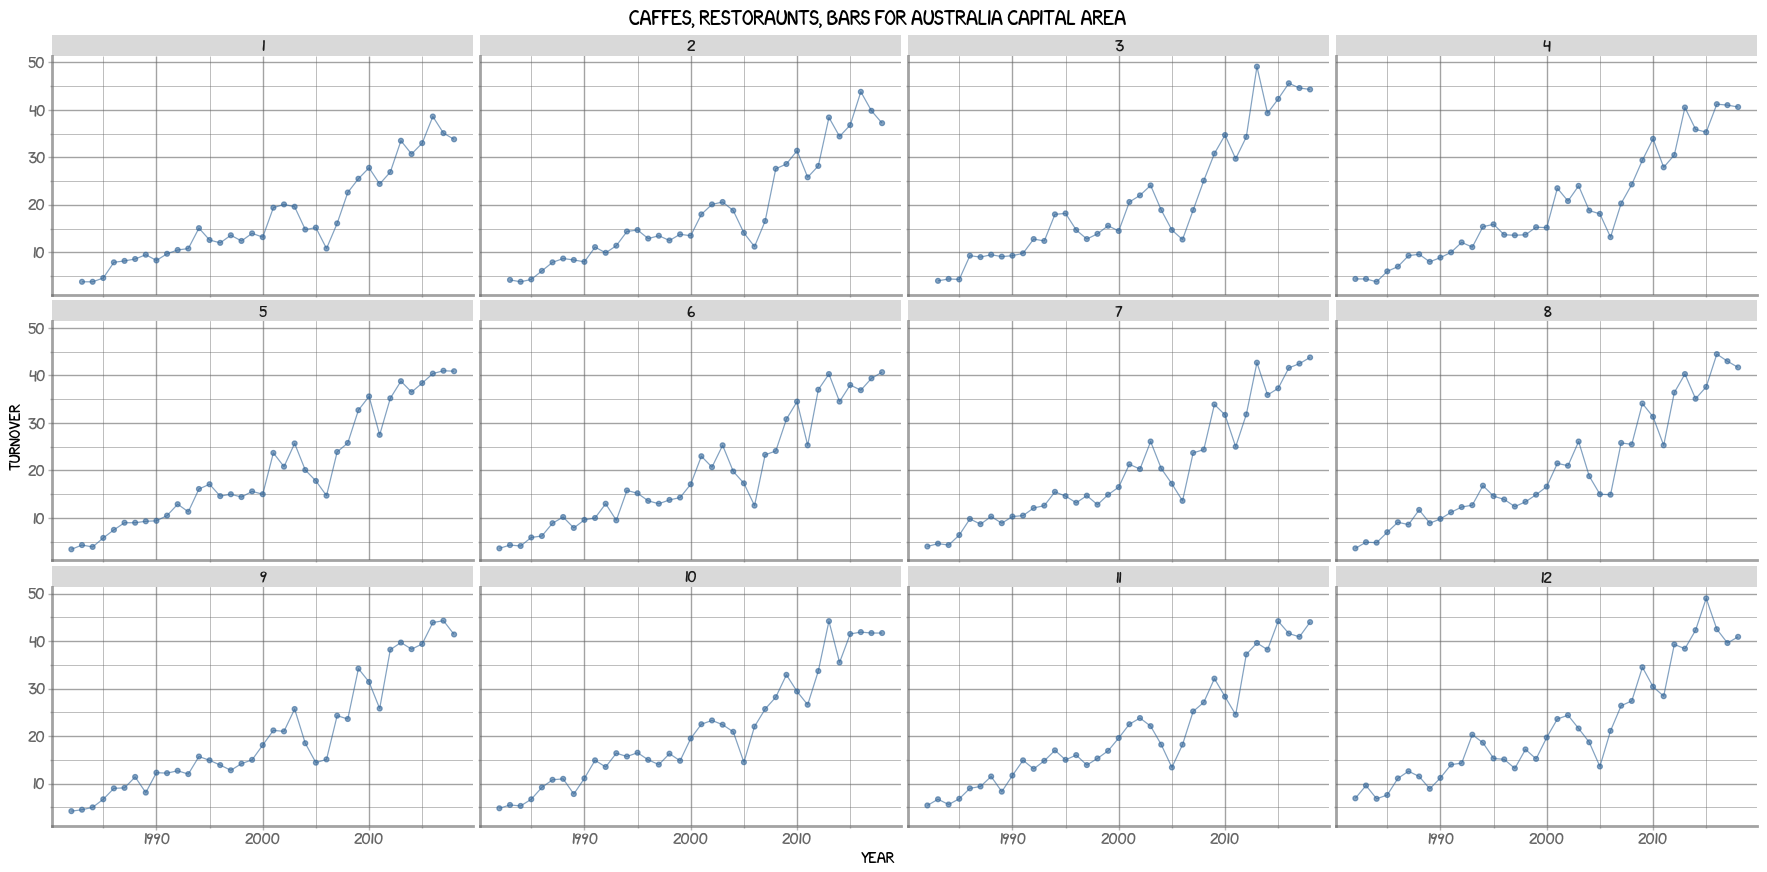

<ggplot: (8764605211923)>

In [58]:
(ggplot(series) +
    aes(x='Year', y='Turnover') +
    geom_line(color="#336699", alpha=0.6) +
    geom_point(color="#336699", alpha=0.6) +
    theme(figure_size=(22, 10)) +
    facet_wrap("Month") +
    ggtitle("Caffes, Restoraunts, Bars for Australia Capital Area") +
    theme_xkcdf_custom()
)

We can see
- An upward trend for all of the months
- A sudden drop in around 2005
- A not particularly strong monthly seasonality
- Some economic cyclical component throughout the years

### Problem 9

Use the following graphics functions: autoplot(), gg_season(), gg_subseries(), gg_lag(), ACF() and explore features from the following time series: “Total Private” Employed from us_employment, Bricks from aus_production, Hare from pelt, “H02” Cost from PBS, and us_gasoline.

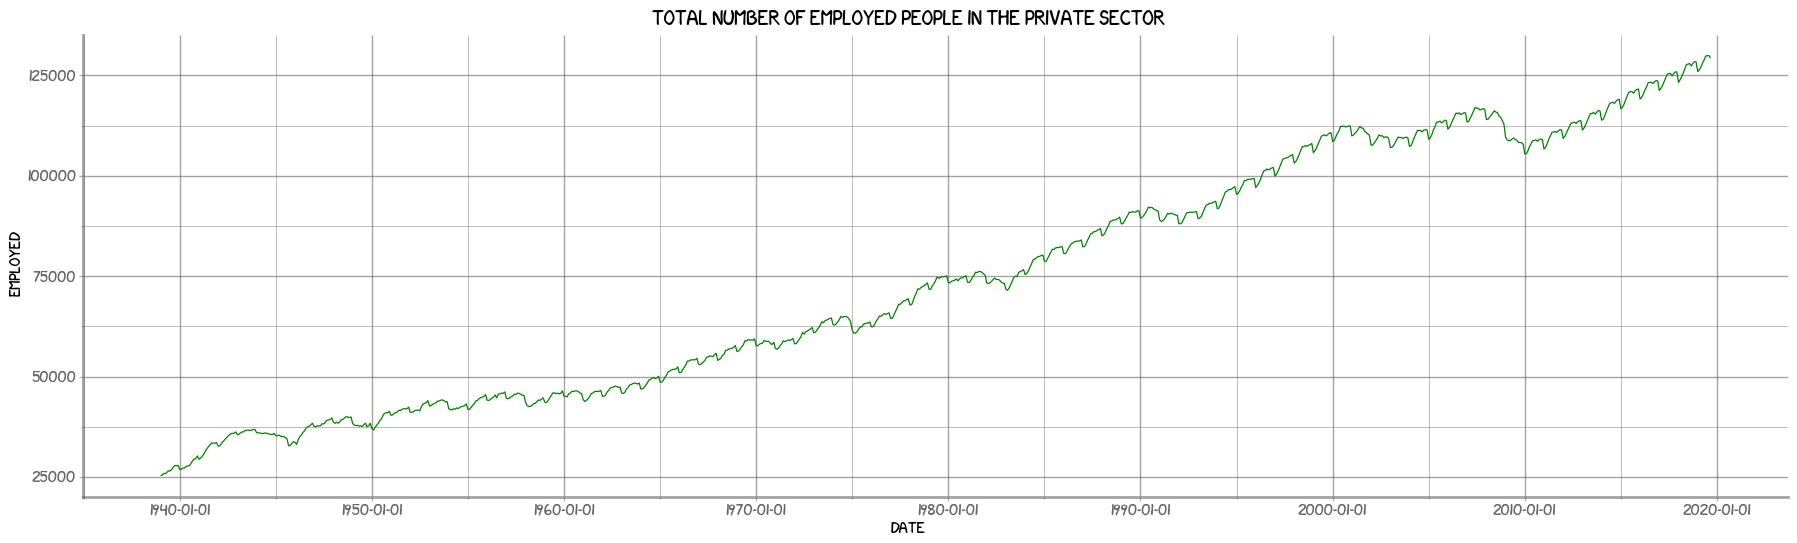

<ggplot: (8764606141660)>

In [60]:
us_employment_df = load_data("us_employment").assign(
    Date=lambda df: pd.to_datetime(df.Month, format="%Y %b")
).assign(
    Year=lambda df: df.Date.dt.year,
    Month=lambda df: df.Date.dt.month
)

total_private_df = us_employment_df[us_employment_df.Title == "Total Private"]

(ggplot(total_private_df) +
    aes(x="Date", y="Employed") +
    geom_line(color="green") +
    # geom_point(color="green", size=0.2) +
    ggtitle("Total number of employed people in the private sector") +
    theme(figure_size=(22, 6)) +
    theme_xkcdf_custom()
)

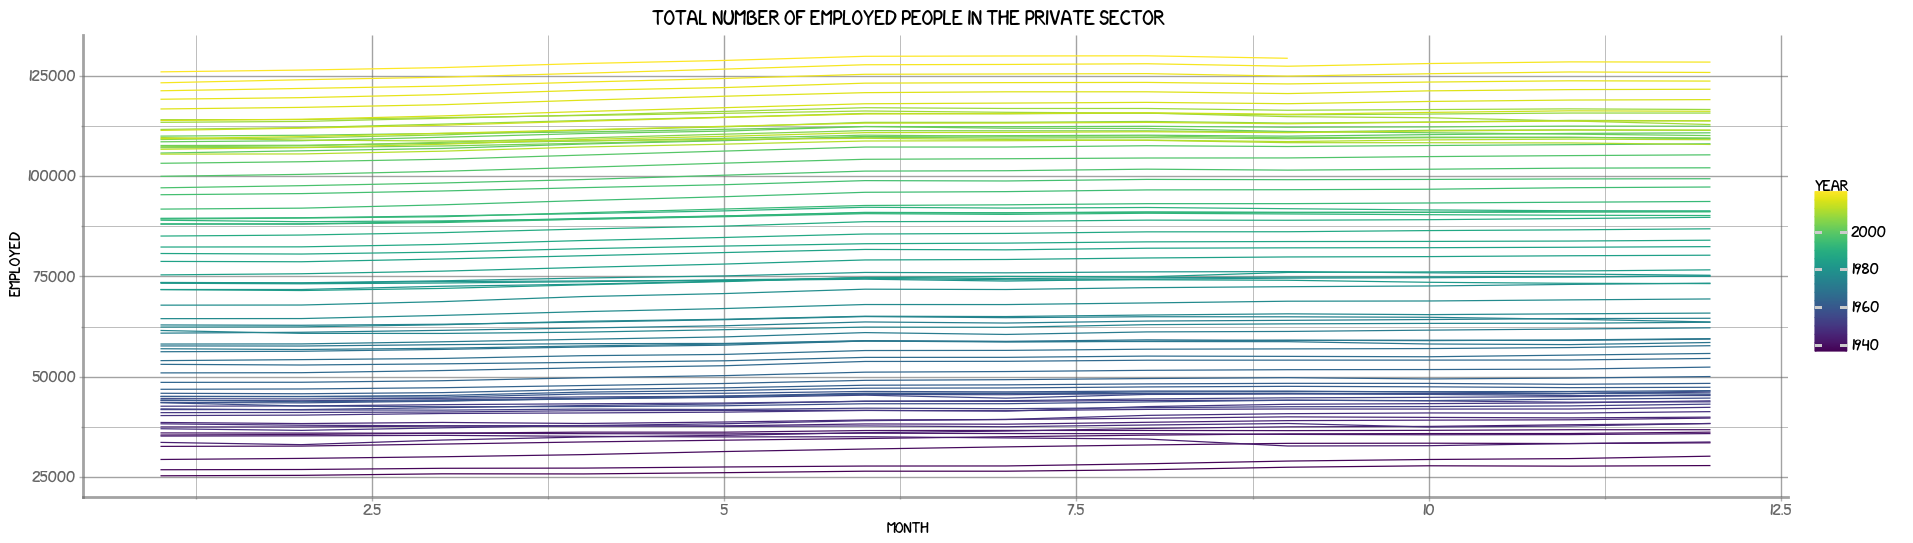

<ggplot: (8764608198316)>

In [59]:
(ggplot(total_private_df) +
    aes(x="Month", y="Employed", color="Year", group="Year") +
    geom_line() +
    ggtitle("Total number of employed people in the private sector") +
    theme(figure_size=(22, 6)) +
    theme_xkcdf_custom()
)

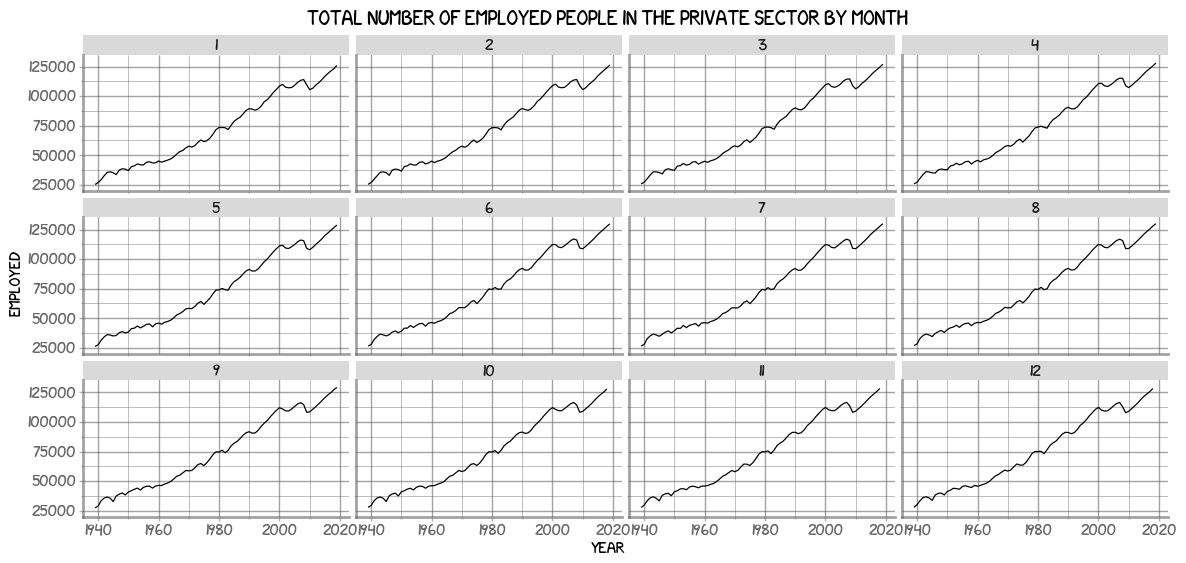

<ggplot: (8764605294975)>

In [61]:
(ggplot(total_private_df) +
    aes(x="Year", y="Employed") +
    geom_line() +
    ggtitle("Total number of employed people in the private sector by month") +
    facet_wrap("Month") +
    theme(figure_size=(14, 6)) +
    theme_xkcdf_custom()
)

We can see only some trend component and some cyclical component

### Problem 10
- 1 - B
- 2 - A
- 3 - D
- 4 - C


### Problem 11

The aus_livestock data contains the monthly total number of pigs slaughtered in Victoria, Australia, from Jul 1972 to Dec 2018. Use filter() to extract pig slaughters in Victoria between 1990 and 1995. Use autoplot() and ACF() for this data. How do they differ from white noise? If a longer period of data is used, what difference does it make to the ACF?



In [62]:
aus_livestock_df = load_data("aus_livestock").assign(
    Date=lambda df: pd.to_datetime(df.Month, format="%Y %b")
).assign(
    Year=lambda df: df.Date.dt.year,
    Month=lambda df: df.Date.dt.month
)

# aus_livestock_filtered_df = 
aus_livestock_filtered_df = aus_livestock_df[aus_livestock_df.Year.between(1990, 1995)]

In [47]:
aus_livestock_filtered_df

Month                      Animal                         State  \
162        1  Bulls, bullocks and steers  Australian Capital Territory   
163        2  Bulls, bullocks and steers  Australian Capital Territory   
164        3  Bulls, bullocks and steers  Australian Capital Territory   
165        4  Bulls, bullocks and steers  Australian Capital Territory   
166        5  Bulls, bullocks and steers  Australian Capital Territory   
...      ...                         ...                           ...   
29083      8                       Sheep             Western Australia   
29084      9                       Sheep             Western Australia   
29085     10                       Sheep             Western Australia   
29086     11                       Sheep             Western Australia   
29087     12                       Sheep             Western Australia   

          Count       Date  Year  
162      3700.0 1990-01-01  1990  
163      2800.0 1990-02-01  1990  
164      3100.0 1990-03-01  1990  
165      2300.0 1990-04-01  1990  
166      3000.0 1990-05-01  1990  
...         ...        ...   ...  
29083  221300.0 1995-08-01  1995  
29084  212100.0 1995-09-01  1995  
29085  243600.0 1995-10-01  1995  
29086  285700.0 1995-11-01  1995  
29087  230800.0 1995-12-01  1995  

[3888 rows x 6 columns]

/usr/local/Caskroom/miniconda/base/envs/fpp/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/usr/local/Caskroom/miniconda/base/envs/fpp/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


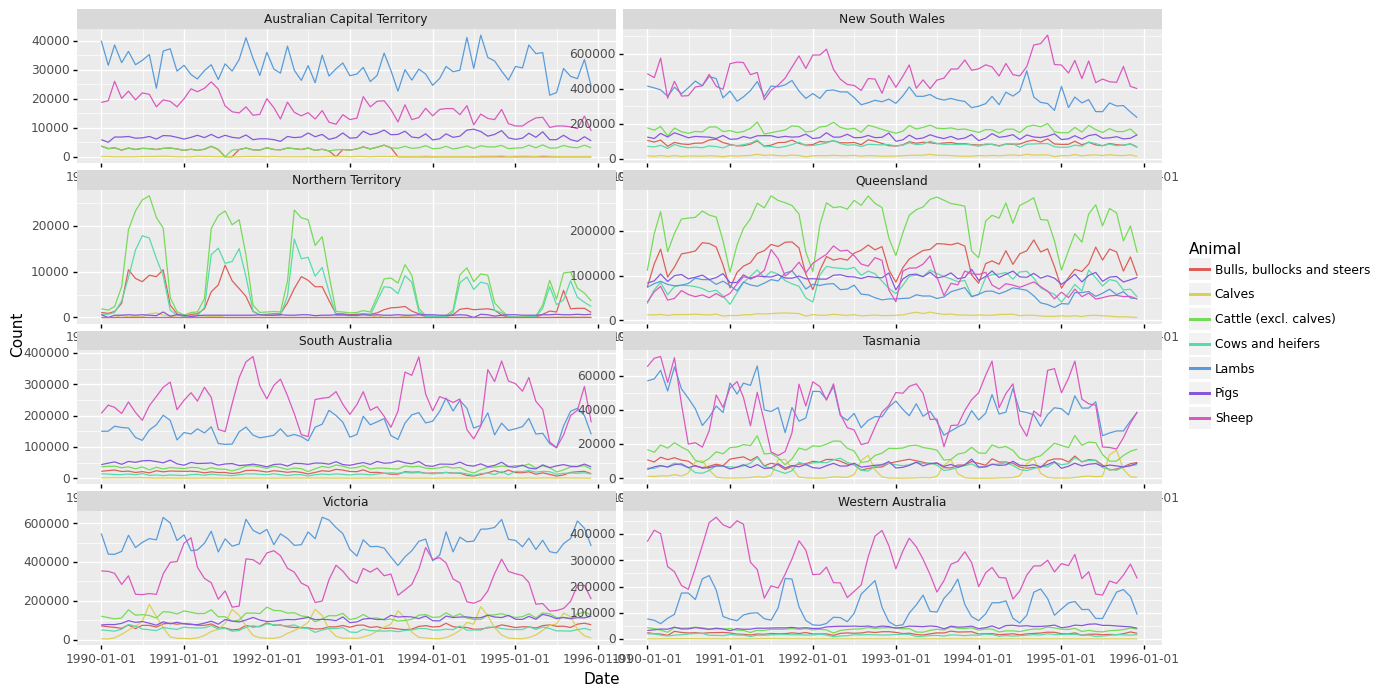

<ggplot: (8764632393539)>

In [64]:
(ggplot(aus_livestock_filtered_df) +
    aes(x="Date", y="Count", color="Animal") +
    geom_line() +
    facet_wrap("State", ncol=2, scales="free") +
    theme(figure_size=(14, 8))
)

/usr/local/Caskroom/miniconda/base/envs/fpp/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/usr/local/Caskroom/miniconda/base/envs/fpp/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


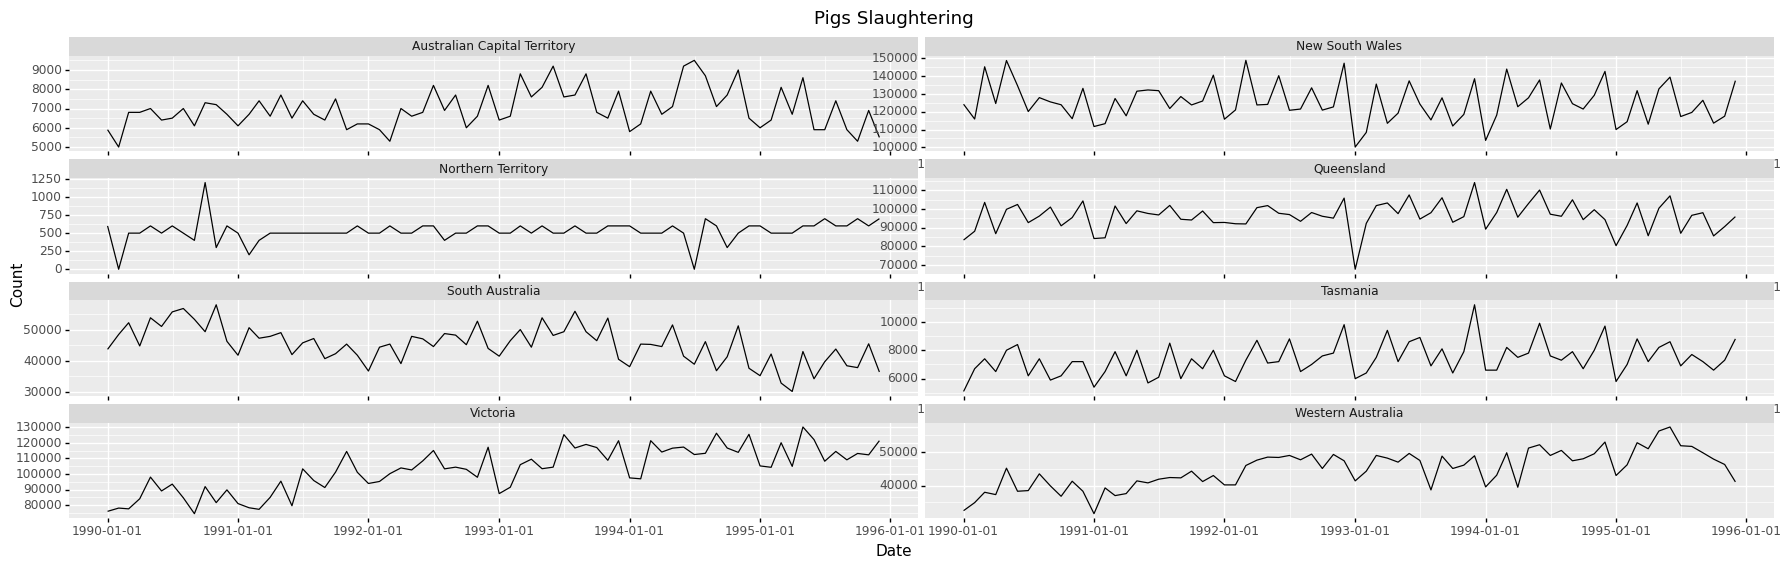

<ggplot: (8764603536237)>

In [65]:
(ggplot(aus_livestock_filtered_df[aus_livestock_filtered_df.Animal == "Pigs"]) +
    aes(x="Date", y="Count") +
    geom_line() +
    facet_wrap("State", ncol=2, scales="free") +
    ggtitle("Pigs Slaughtering") +
    theme(figure_size=(22, 6))
)

/usr/local/Caskroom/miniconda/base/envs/fpp/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/usr/local/Caskroom/miniconda/base/envs/fpp/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


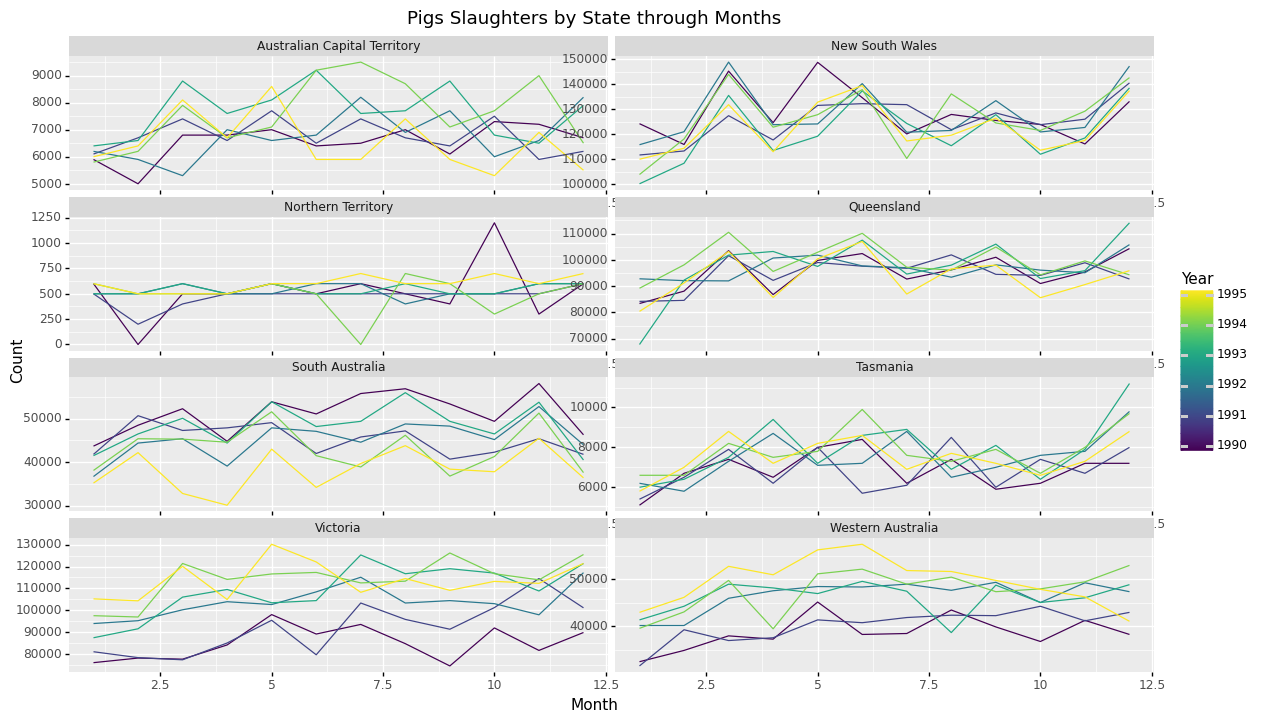

<ggplot: (8764603643886)>

In [50]:
(ggplot(aus_livestock_filtered_df[aus_livestock_filtered_df.Animal == "Pigs"]) +
    aes(x="Month", y="Count", color="Year", group="Year") +
    geom_line() +
    facet_wrap("State", ncol=2, scales="free") +
    ggtitle("Pigs Slaughters by State through Months") +
    theme(figure_size=(14, 8))
)


/usr/local/Caskroom/miniconda/base/envs/fpp/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/usr/local/Caskroom/miniconda/base/envs/fpp/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


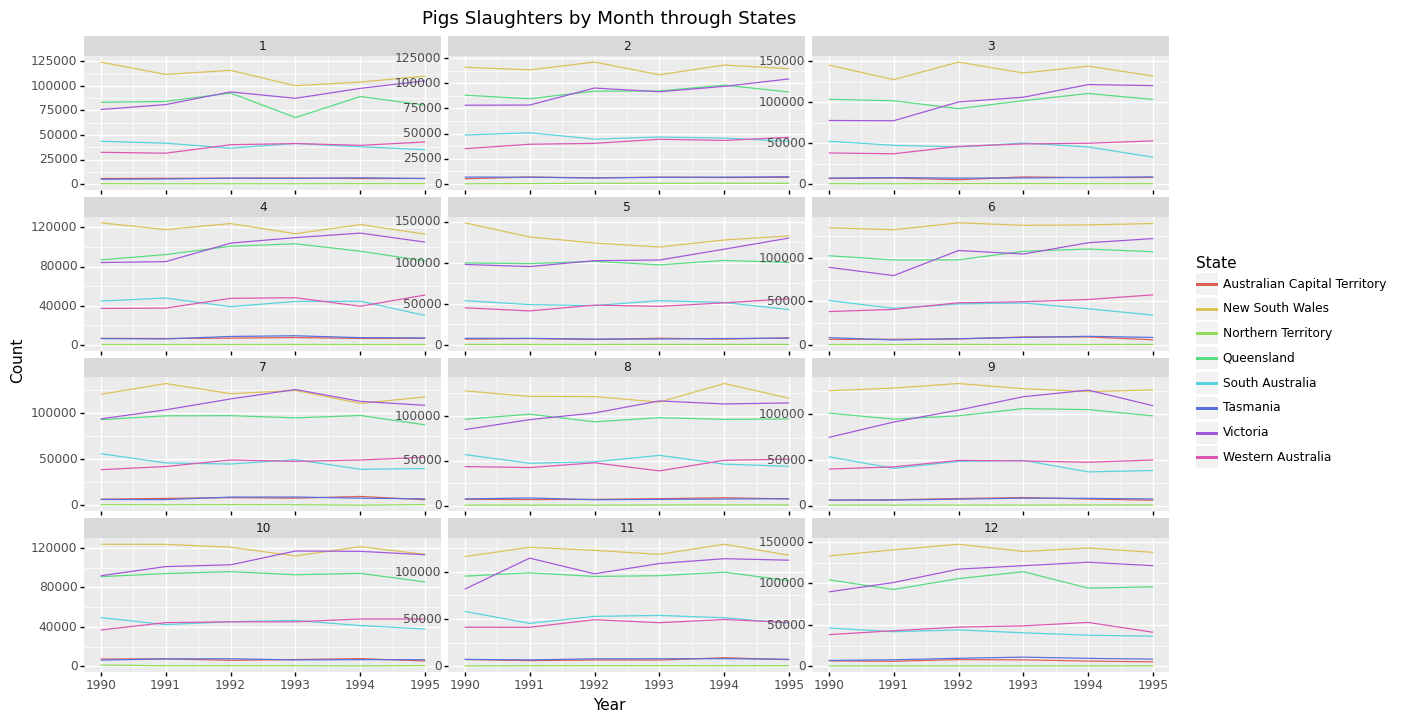

<ggplot: (8764604699025)>

In [51]:
(ggplot(aus_livestock_filtered_df[aus_livestock_filtered_df.Animal == "Pigs"]) +
    aes(x="Year", y="Count", color="State", group="State") +
    geom_line() +
    facet_wrap("Month", ncol=3, scales="free") +
    theme(figure_size=(14, 8)) +
    ggtitle("Pigs Slaughters by Month through States")
)


We can see that
- In different states there is different slaughtering of poor animals
- In some states there's seasonality for some of the animals and non for the others
- Trend for the pigs in the Victoria state
- Huge spike of pig slaughtering in Northern Teritory around 1991, October
- Pig seasonality for some of the states

### Problem 12

Compute the daily changes in Google closing stock prices.

- Why was it necessary to re-index the tsibble?
- Plot these differences and their ACF.
- Do the changes in the stock prices look like white noise?


/var/folders/m5/zsd1m_dd4wd36c3_4bftzh280000gn/T/ipykernel_16780/1614308639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


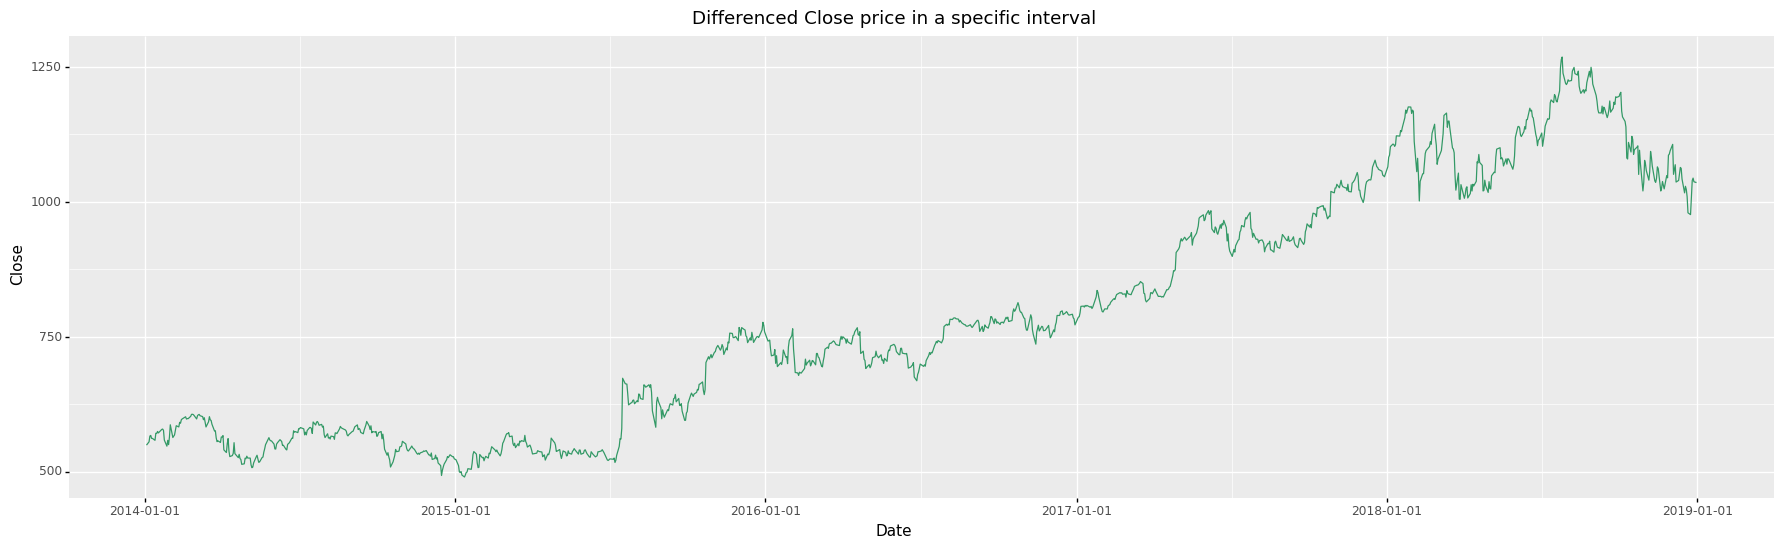

<ggplot: (8764604984561)>

In [69]:
# problem 12
google_stock_df = gafa_stock_df[gafa_stock_df.Symbol == "GOOG"]
google_stock_df["Close_diffed"] = google_stock_df.Close.diff()
(ggplot(google_stock_df[1:]) +
    aes(x="Date", y="Close") +
    geom_line(color="#339966") +
    ggtitle("Differenced Close price in a specific interval") +
    theme(figure_size=(22, 6))
)


It doesn't look like a white noise.